### Persistance images from small values

In [32]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage
from persim import PersistenceImager

In [33]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [34]:
# import all the pkl files in the directory to a list
import glob
import pickle

In [35]:
# import the data
data = []
for file in glob.glob("./tennessee/results/selected coordinates for each county/*.pkl"):
    with open(file, 'rb') as f:
        data.append(pickle.load(f))

In [36]:
data[7]

{'EP_DISABL':              FIPS  EP_DISABL  \
 9     47093000901        4.1   
 382   47093001800       15.3   
 387   47093002400       15.4   
 389   47093002800       14.4   
 391   47093003000       12.6   
 ...           ...        ...   
 1452  47093002600       11.4   
 1453  47093004404        9.7   
 1454  47093004500        8.2   
 1458  47093006900        4.9   
 1490  47093000100       16.0   
 
                                                geometry  \
 9     POLYGON ((-83.93293 35.95745, -83.93079 35.958...   
 382   POLYGON ((-83.91070 36.00319, -83.90901 36.005...   
 387   POLYGON ((-83.93122 35.93312, -83.93110 35.934...   
 389   POLYGON ((-83.97953 35.98017, -83.97910 35.981...   
 391   POLYGON ((-83.92247 36.01896, -83.91369 36.021...   
 ...                                                 ...   
 1452  POLYGON ((-83.97965 35.95257, -83.96794 35.958...   
 1453  POLYGON ((-84.03695 35.93007, -84.02293 35.933...   
 1454  POLYGON ((-84.06289 35.93263, -84.05881 35

In [37]:
# # loop through the data and create a list of the coordinates
# coordinates = []
# for i in range(len(data)):
#     # print(type(data[i]))

#     print(f"COUNTY: {i}")
#     # add new lines
#     print("\n")

#     # loop through data[i] dictionary and get the coordinates
#     for key, value in data[i].items():
#         # coordinates.append(value)
#         print(key)
#         # print(value)

#         # if the value is not empty, append it to the list
#         if len(value)> 0:
#             data_coordinates = np.array([np.array(coord) for coord in value['coords']])


#             # creating the persistence diagram from rips class
#             rips = Rips(maxdim=1, coeff=2)
#             dgms = rips.fit_transform(data_coordinates)

#             # seperate the diagrams H0 and H1
#             diagrams_h0 = dgms[0]
#             diagrams_h1 = dgms[1]

#             print(diagrams_h1)

#             # remove last data point in H0 diagram - it is infinity
#             diagrams_h0_without_inf = diagrams_h0[0:-1]

#             plt.figure(figsize=(12,6))
#             if len(diagrams_h0) > 1:
#                 plt.subplot(121)
#                 rips.plot(diagrams_h0_without_inf, show=False)
#                 plt.title("PD of $H_0$")

#             # plot this only diagrams_h1 is not empty
#             if len(diagrams_h1) > 0:
#                 plt.subplot(122)
#                 rips.plot(diagrams_h1, show=False)
#                 plt.title("PD of $H_1$")

#             plt.show()
#             plt.close()

#     # break


In [38]:
len(data)

95

In [39]:
# loop through the data and create a list of the persistence diagrams

diagrams = []
for i in range(len(data)):
    diagrams.append(data[i][1])

KeyError: 1

In [40]:
data_coordinates_list = []
for variable_name, selected_coordinates in data[7].items():
    data_coordinates = np.array([np.array(coord) for coord in selected_coordinates['coords']])

    print(f"Variable: {variable_name}")
    print(data_coordinates.shape)

    # append the data to the list
    data_coordinates_list.append(data_coordinates)



    

Variable: EP_DISABL
(80, 2)
Variable: EP_NOHSDP
(0,)
Variable: EP_PCI
(48, 2)
Variable: EP_MOBILE
(112, 2)
Variable: EP_POV
(42, 2)


In [41]:
data2 = data_coordinates_list[2]

In [42]:
data2

array([[-83.92517835,  35.9530135 ],
       [-83.88457917,  35.9859635 ],
       [-83.87270759,  35.97818   ],
       [-83.88052538,  35.949992  ],
       [-83.91761753,  35.9362045 ],
       [-83.96528696,  35.9658725 ],
       [-83.96197096,  35.986049  ],
       [-83.9396374 ,  36.004646  ],
       [-83.90595174,  36.017409  ],
       [-83.87518723,  36.017389  ],
       [-83.86233066,  36.002858  ],
       [-83.99142698,  35.9875385 ],
       [-83.97175937,  35.9972115 ],
       [-83.96027454,  36.0132255 ],
       [-83.93845992,  36.0190715 ],
       [-83.89219089,  36.0344815 ],
       [-84.07717586,  35.9375025 ],
       [-84.03159741,  35.9512115 ],
       [-84.0005854 ,  36.0084375 ],
       [-83.94254716,  36.040976  ],
       [-83.82896839,  36.039982  ],
       [-83.76705893,  36.0332825 ],
       [-83.7049744 ,  36.0223485 ],
       [-83.83850807,  35.9302865 ],
       [-84.04796634,  36.075807  ],
       [-84.04794657,  36.034468  ],
       [-84.01914868,  36.0370405 ],
 

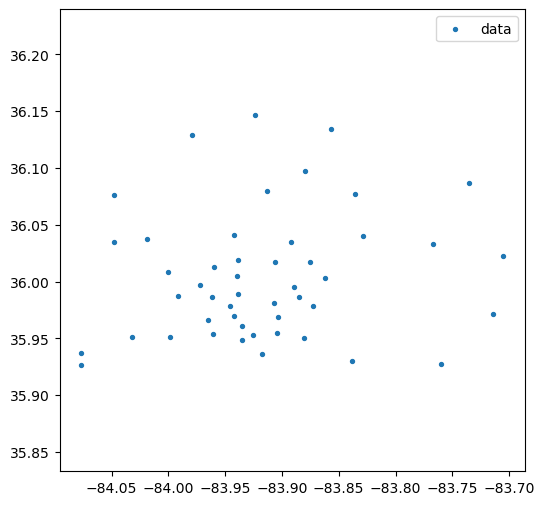

In [43]:
plt.rcParams["figure.figsize"] = (6, 6)
plt.scatter(data2[:,0], data2[:,1], label="data", s=8)
plt.axis('equal')
plt.legend()
plt.show()

In [44]:
# creating the persistence diagram from rips class
rips = Rips(maxdim=1, coeff=2)
dgms = rips.fit_transform(data2)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [14]:
# seperate the diagrams H0 and H1
diagrams_h0 = dgms[0]
diagrams_h1 = dgms[1]

NameError: name 'dgms' is not defined

In [15]:
len(diagrams_h0)

NameError: name 'diagrams_h0' is not defined

In [16]:
diagrams_h0

NameError: name 'diagrams_h0' is not defined

In [17]:
len(diagrams_h1)>0

NameError: name 'diagrams_h1' is not defined

In [18]:
# remove last data point in H0 diagram - it is infinity
diagrams_h0_without_inf = diagrams_h0[0:-1]

NameError: name 'diagrams_h0' is not defined

NameError: name 'diagrams_h0_without_inf' is not defined

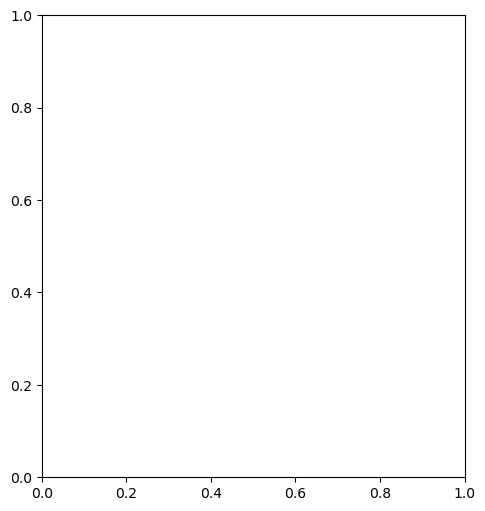

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h0_without_inf, show=False)
plt.title("PD of $H_0$")

plt.subplot(122)
rips.plot(diagrams_h1, show=False)
plt.title("PD of $H_1$")

plt.show()

In [20]:
# lifetime is y coordinates diagrams_h0_without_inf
lifetime = diagrams_h1[:,1]

NameError: name 'diagrams_h1' is not defined

In [21]:
# Define custom weighting function that uses lifetime as weight 
# default weight function is 'persistance'
def weight_by_lifetime(birth, persistence, lifetime, **kwargs):
    # Use lifetime as weight
    #return lifetime
    return np.exp(lifetime)

In [22]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified 
# either by a float or a 2x2 covariance matrix
# pimgr = PersistenceImager(pixel_size=0.1, weight=weight_by_lifetime, weight_params={'lifetime': lifetime})
pimgr1 = PersistenceImager(pixel_size=0.1)
pimgr1.fit(diagrams_h1)

NameError: name 'diagrams_h1' is not defined

NameError: name 'diagrams_h1' is not defined

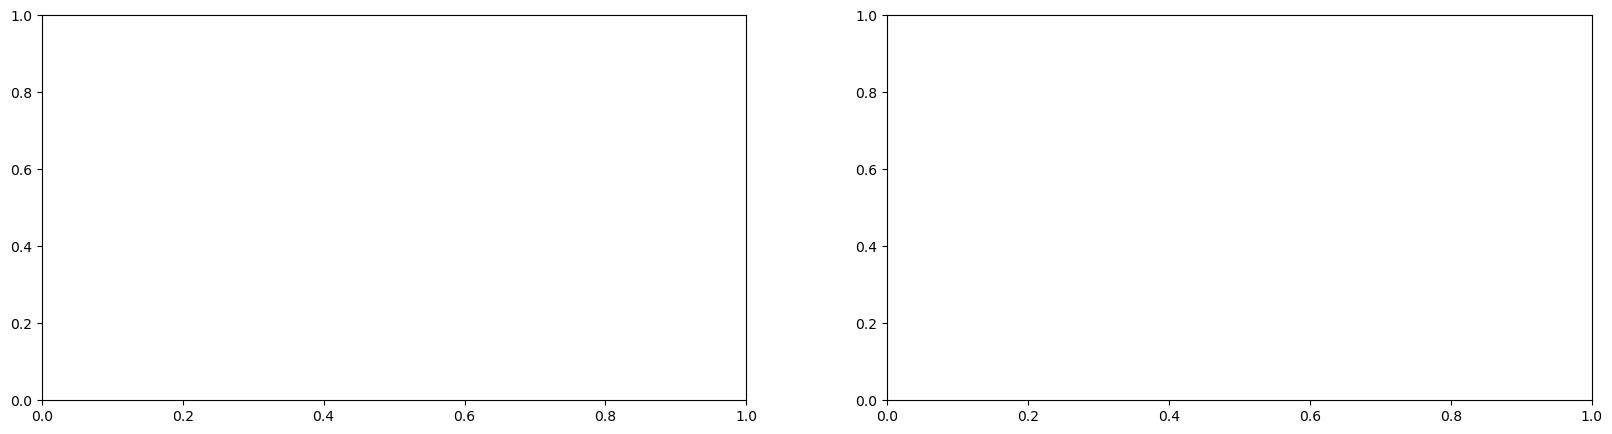

In [23]:
pimgr1.pixel_size = 0.005
pimgr1.birth_range = (-0.02, 0.1)
pimgr1.pers_range = (-0.02, 0.1)


fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr1.kernel_params = {'sigma': .1}
pimgr1.plot_diagram(diagrams_h1, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr1.kernel_params = {'sigma': 0.000005}
pimgr1.plot_image(pimgr1.transform(diagrams_h1), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

In [24]:
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(diagrams_h0_without_inf)

pimgr.pixel_size = 0.005
pimgr.birth_range = (-0.02, 0.1)
pimgr.pers_range = (-0.02, 0.1)


# pixel size 1 and sigma 0.1
fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.000005}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

NameError: name 'diagrams_h0_without_inf' is not defined

In [25]:
A = pimgr.transform(diagrams_h0_without_inf)
B = pimgr1.transform(diagrams_h1)

NameError: name 'diagrams_h0_without_inf' is not defined

In [26]:
A.shape

NameError: name 'A' is not defined

In [27]:
B.shape

NameError: name 'B' is not defined

In [28]:
A[23].shape

NameError: name 'A' is not defined

In [29]:
# add A and B two images by making the shape of the final image 24,24
# A is 24, 24
# B is 24, 24
# add A and B to get C
# C is 24, 24

C = A +8*B


NameError: name 'A' is not defined

In [30]:
C.shape

NameError: name 'C' is not defined

In [31]:
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(diagrams_h0_without_inf)

pimgr.pixel_size = 0.005
pimgr.birth_range = (-0.02, 0.1)
pimgr.pers_range = (-0.02, 0.1)


# pixel size 1 and sigma 0.1
fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.000005}
pimgr.plot_image(C, ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

NameError: name 'diagrams_h0_without_inf' is not defined